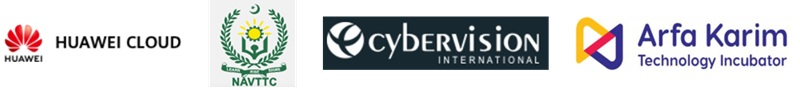

---

# **Huawei Cloud AI Training Day 10**


# **Practical: Manipulate data using NumPy and Pandas in ModelArts**

1. Import real dataset (e.g., Iris)  
2. Clean and transform data with Pandas  
3. Perform statistical analysis using NumPy  
4. Visualize outputs using Matplotlib or Seaborn  


In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# 1. Import real dataset (Iris dataset from sklearn)
iris = load_iris()
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [3]:
# Create a pandas DataFrame
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                      columns=iris['feature_names'] + ['target'])
iris_df['species'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [4]:
# 2. Clean and transform data with Pandas
# Check for missing values
print("\nMissing values:\n", iris_df.isnull().sum())


Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64


In [5]:
# Basic statistics
print("\nDataset statistics:\n", iris_df.describe())


Dataset statistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [6]:
# 3. Perform statistical analysis using NumPy
# Calculate mean, median, std for each feature
features = iris['feature_names']
for feature in features:
    print(f"\n{feature} statistics:")
    print("Mean:", np.mean(iris_df[feature]))
    print("Median:", np.median(iris_df[feature]))
    print("Std dev:", np.std(iris_df[feature]))
    print("Min:", np.min(iris_df[feature]))
    print("Max:", np.max(iris_df[feature]))


sepal length (cm) statistics:
Mean: 5.843333333333334
Median: 5.8
Std dev: 0.8253012917851409
Min: 4.3
Max: 7.9

sepal width (cm) statistics:
Mean: 3.0573333333333337
Median: 3.0
Std dev: 0.43441096773549437
Min: 2.0
Max: 4.4

petal length (cm) statistics:
Mean: 3.7580000000000005
Median: 4.35
Std dev: 1.7594040657753032
Min: 1.0
Max: 6.9

petal width (cm) statistics:
Mean: 1.1993333333333336
Median: 1.3
Std dev: 0.7596926279021594
Min: 0.1
Max: 2.5


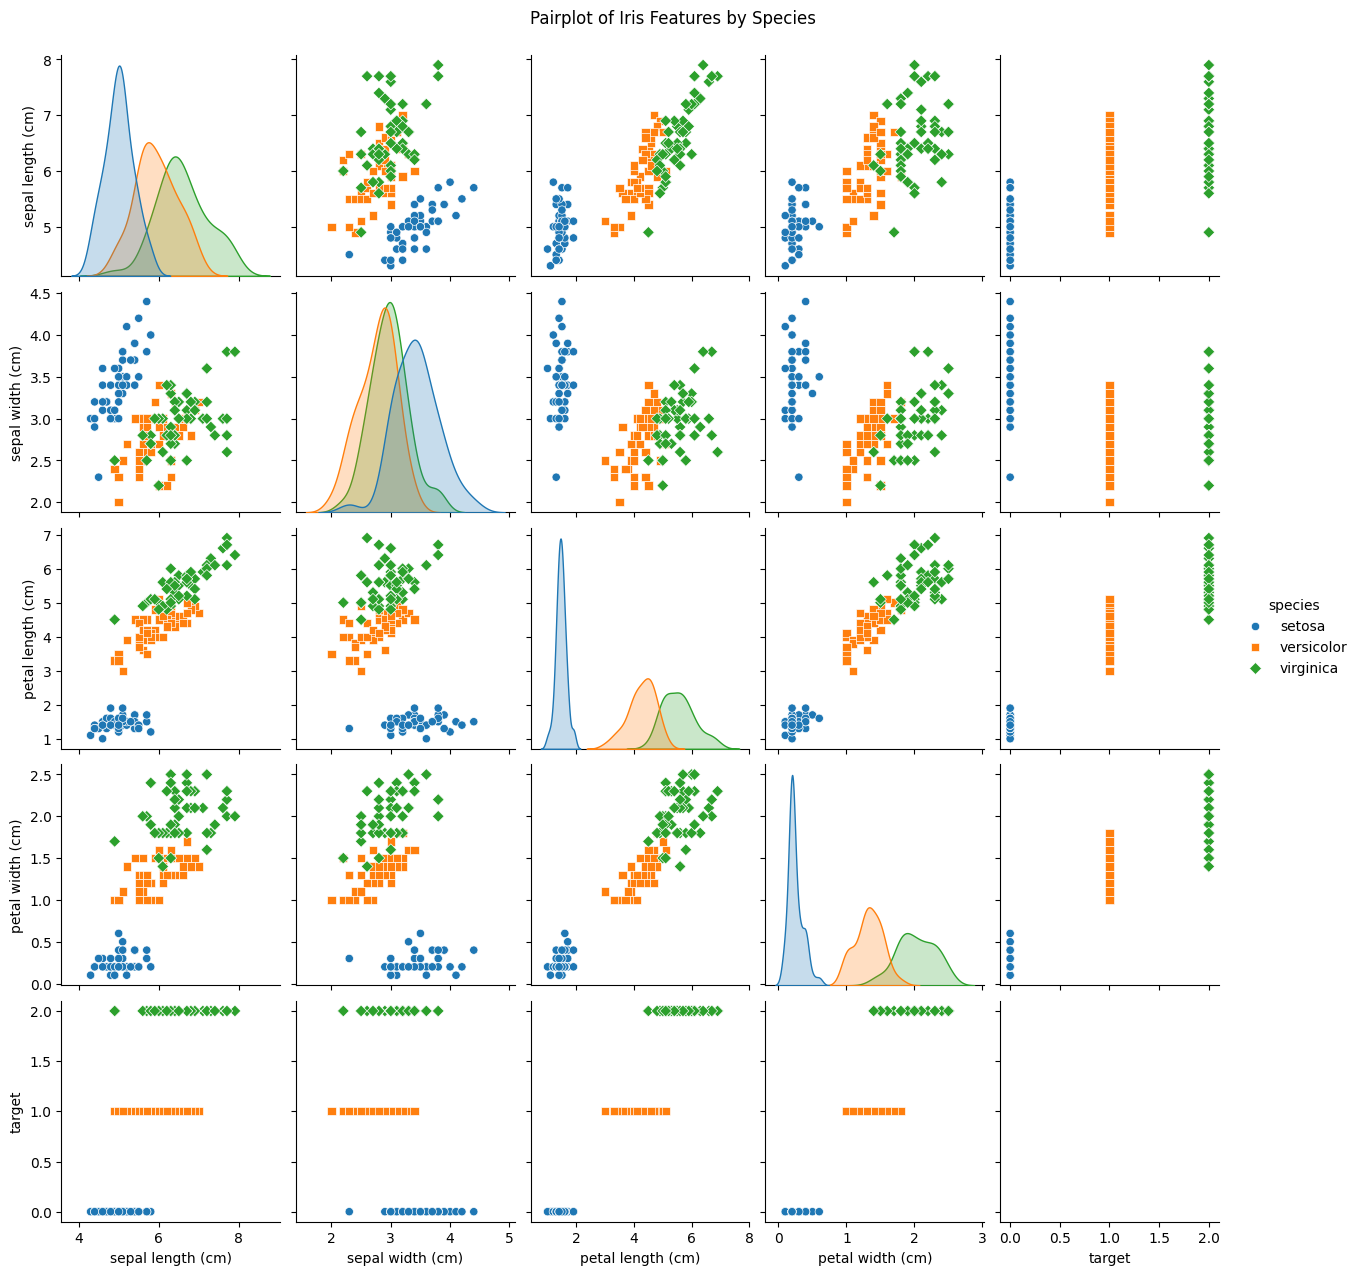

In [7]:
# 4. Visualize outputs using Matplotlib/Seaborn
# Pairplot to visualize relationships between features
sns.pairplot(iris_df, hue='species', markers=['o', 's', 'D'])
plt.suptitle("Pairplot of Iris Features by Species", y=1.02)
plt.show()

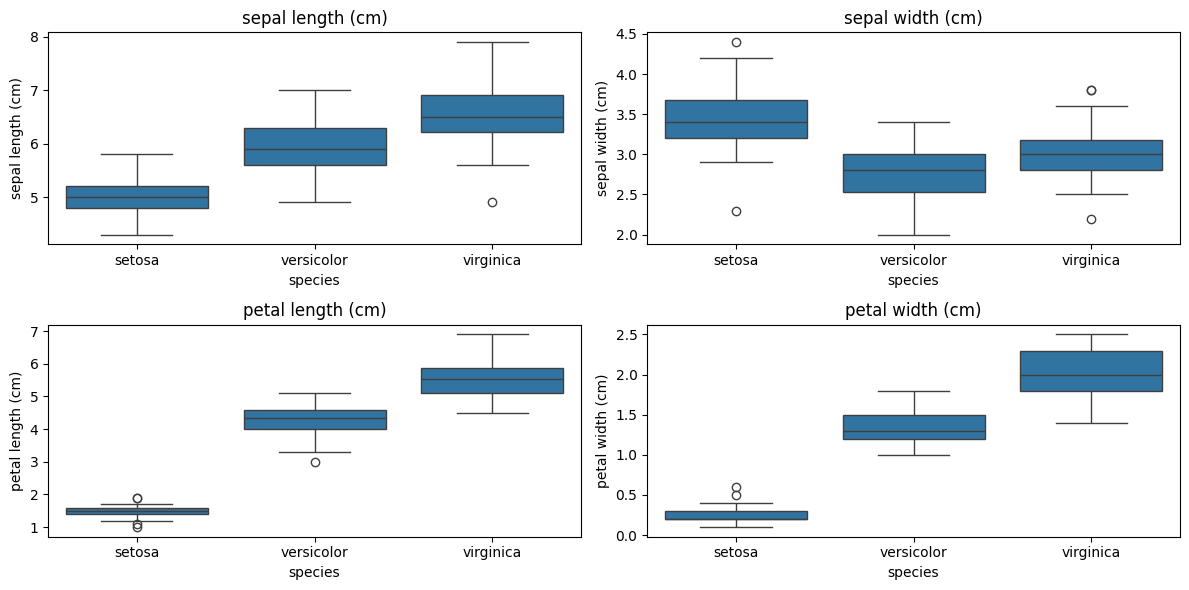

In [8]:
# Boxplot for each feature by species
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=iris_df)
    plt.title(feature)
plt.tight_layout()
plt.show()

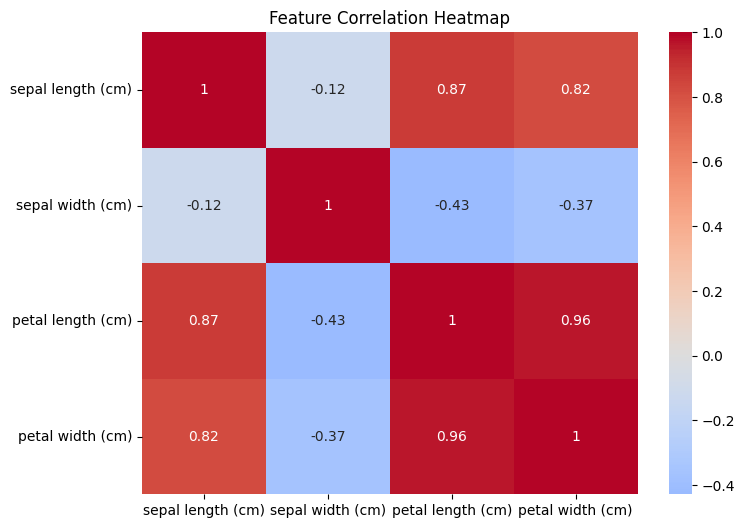

In [9]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
corr = iris_df[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

In [10]:
# Prepare data for machine learning
X = iris_df[features]
y = iris_df['target']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

In [12]:
# Evaluate model
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [13]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Accuracy: 1.0


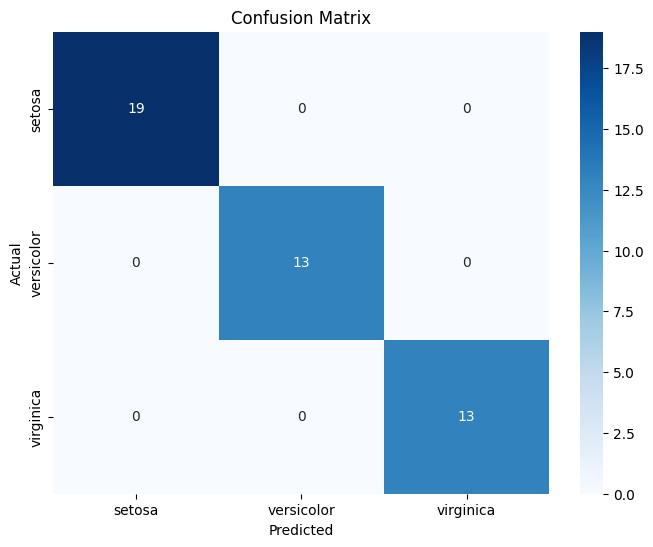

In [14]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()